In [174]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#For linear regrassion problem, I will be import regression algorithm libraries 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Classification Algorithm

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [175]:
# read data set into dataframe
df = pd.read_csv('avocado.csv')

In [176]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [177]:
df.shape

(18249, 14)

In [178]:
#Check for null values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [179]:
#Check for data types
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [180]:
# Unnamed column is not contributing anything and will be dropped
df.drop(columns=['Unnamed: 0'], inplace=True)

df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [181]:
# convert object values to numerical for analysis

# converting string values into numbers for model to use
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df.dtypes[col] == 'object':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
print(df)

       Date  AveragePrice  Total Volume     4046       4225    4770  \
0        51          1.33      64236.62  1036.74   54454.85   48.16   
1        50          1.35      54876.98   674.28   44638.81   58.33   
2        49          0.93     118220.22   794.70  109149.67  130.50   
3        48          1.08      78992.15  1132.00   71976.41   72.58   
4        47          1.28      51039.60   941.48   43838.39   75.78   
...     ...           ...           ...      ...        ...     ...   
18244   161          1.63      17074.83  2046.96    1529.20    0.00   
18245   160          1.71      13888.04  1191.70    3431.50    0.00   
18246   159          1.87      13766.76  1191.92    2452.79  727.94   
18247   158          1.93      16205.22  1527.63    2981.04  727.01   
18248   157          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015    

In [182]:
df

Date  AveragePrice  Total Volume     4046       4225    4770  \
0        51          1.33      64236.62  1036.74   54454.85   48.16   
1        50          1.35      54876.98   674.28   44638.81   58.33   
2        49          0.93     118220.22   794.70  109149.67  130.50   
3        48          1.08      78992.15  1132.00   71976.41   72.58   
4        47          1.28      51039.60   941.48   43838.39   75.78   
...     ...           ...           ...      ...        ...     ...   
18244   161          1.63      17074.83  2046.96    1529.20    0.00   
18245   160          1.71      13888.04  1191.70    3431.50    0.00   
18246   159          1.87      13766.76  1191.92    2452.79  727.94   
18247   158          1.93      16205.22  1527.63    2981.04  727.01   
18248   157          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
18244    13498.67    13066.82      431.85          0.0     1  2018      53  
18245     9264.84     8940.04      324.80          0.0     1  2018      53  
18246     9394.11     9351.80       42.31          0.0     1  2018      53  
18247    10969.54    10919.54       50.00          0.0     1  2018      53  
18248    12014.15    11988.14       26.01          0.0     1  2018      53  

[18249 rows x 13 columns]

In [183]:
df.dtypes

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

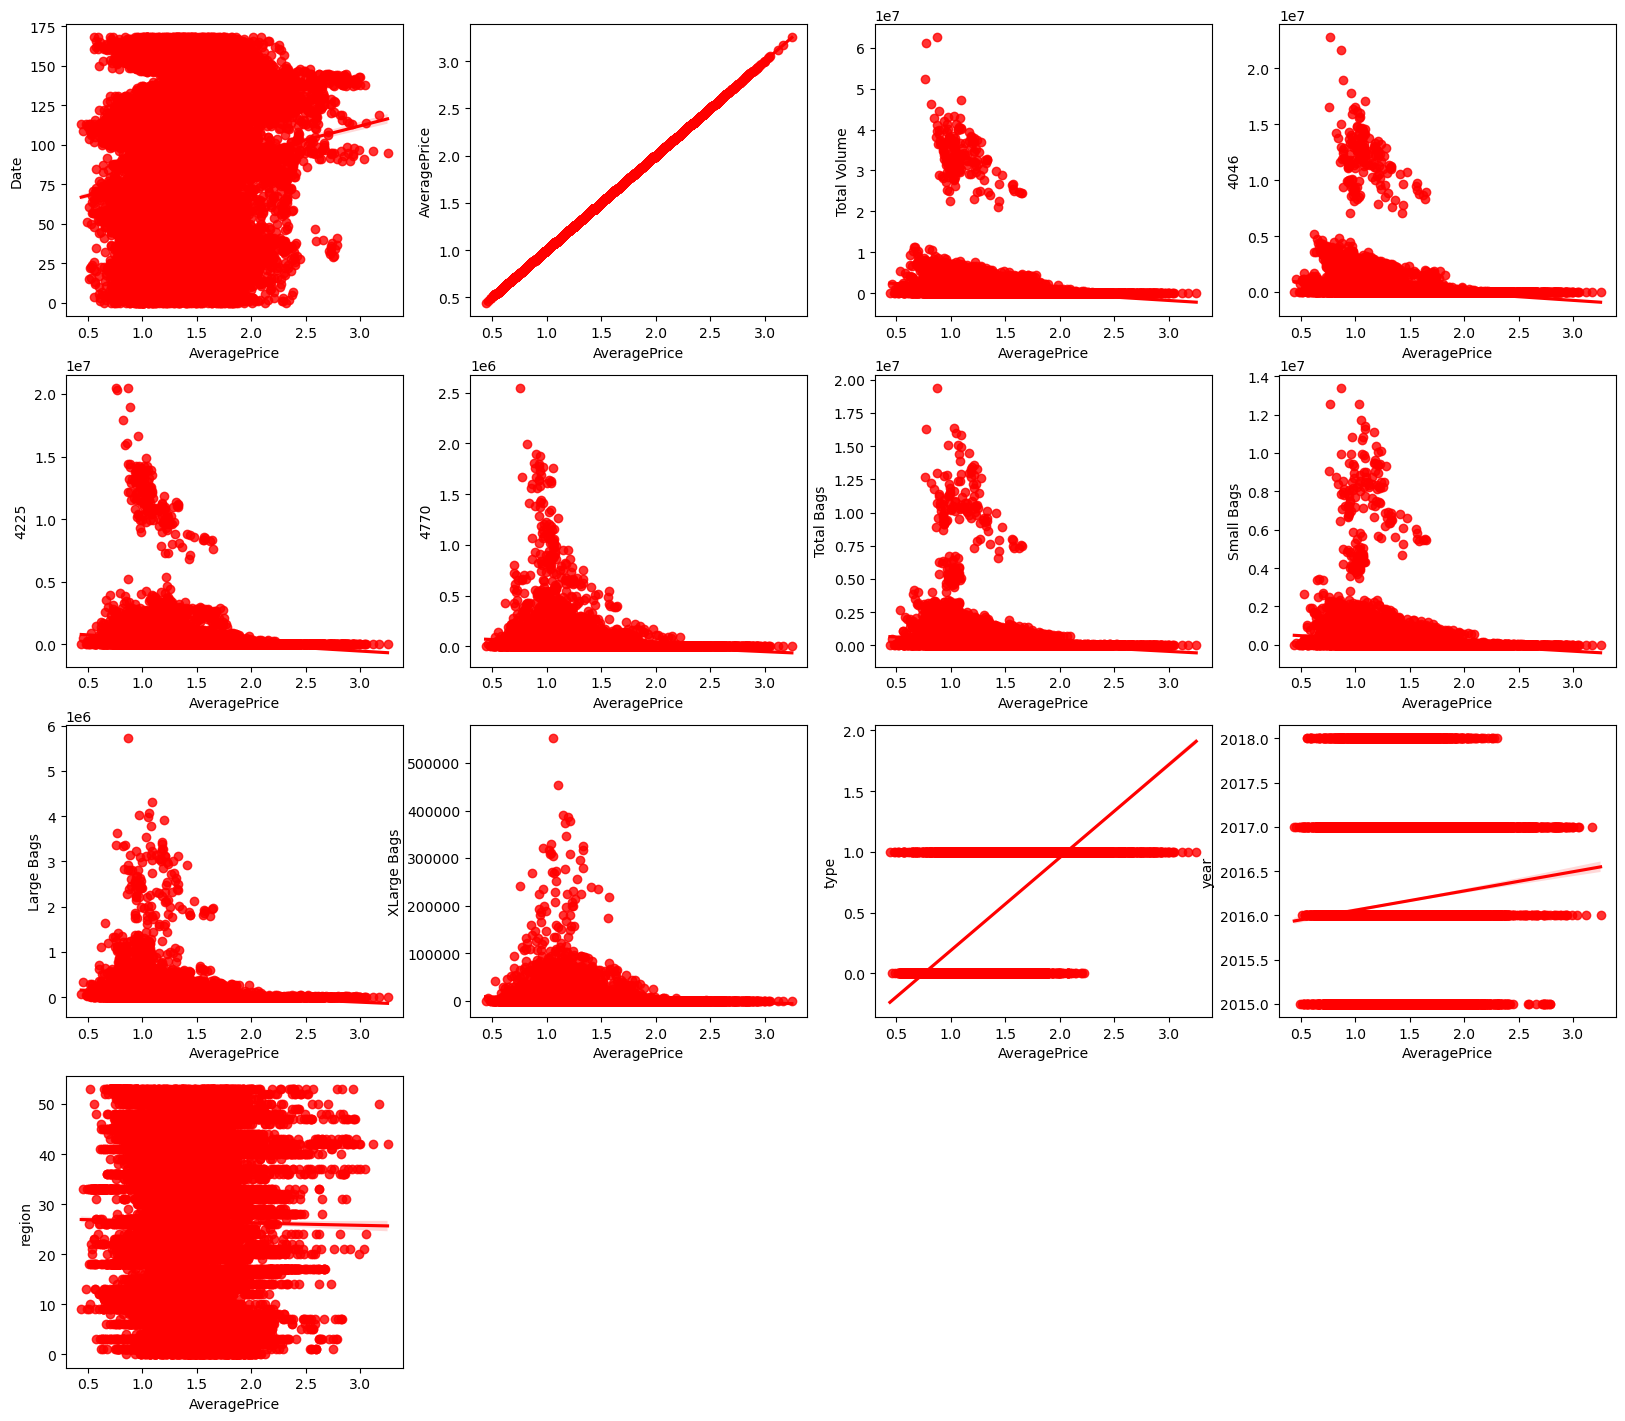

In [184]:
# Plot to check correlationship between features and label AveragePrice

plt.figure(figsize=(20,22))

p = 1

for i in df:
    if p <= 13:
        plt.subplot(5,4,p)
        snb.regplot(x='AveragePrice', y=i, data=df, color='r')
        plt.xlabel='AveragePrice'
        plt.ylabel=i
        
    p += 1

plt.show()

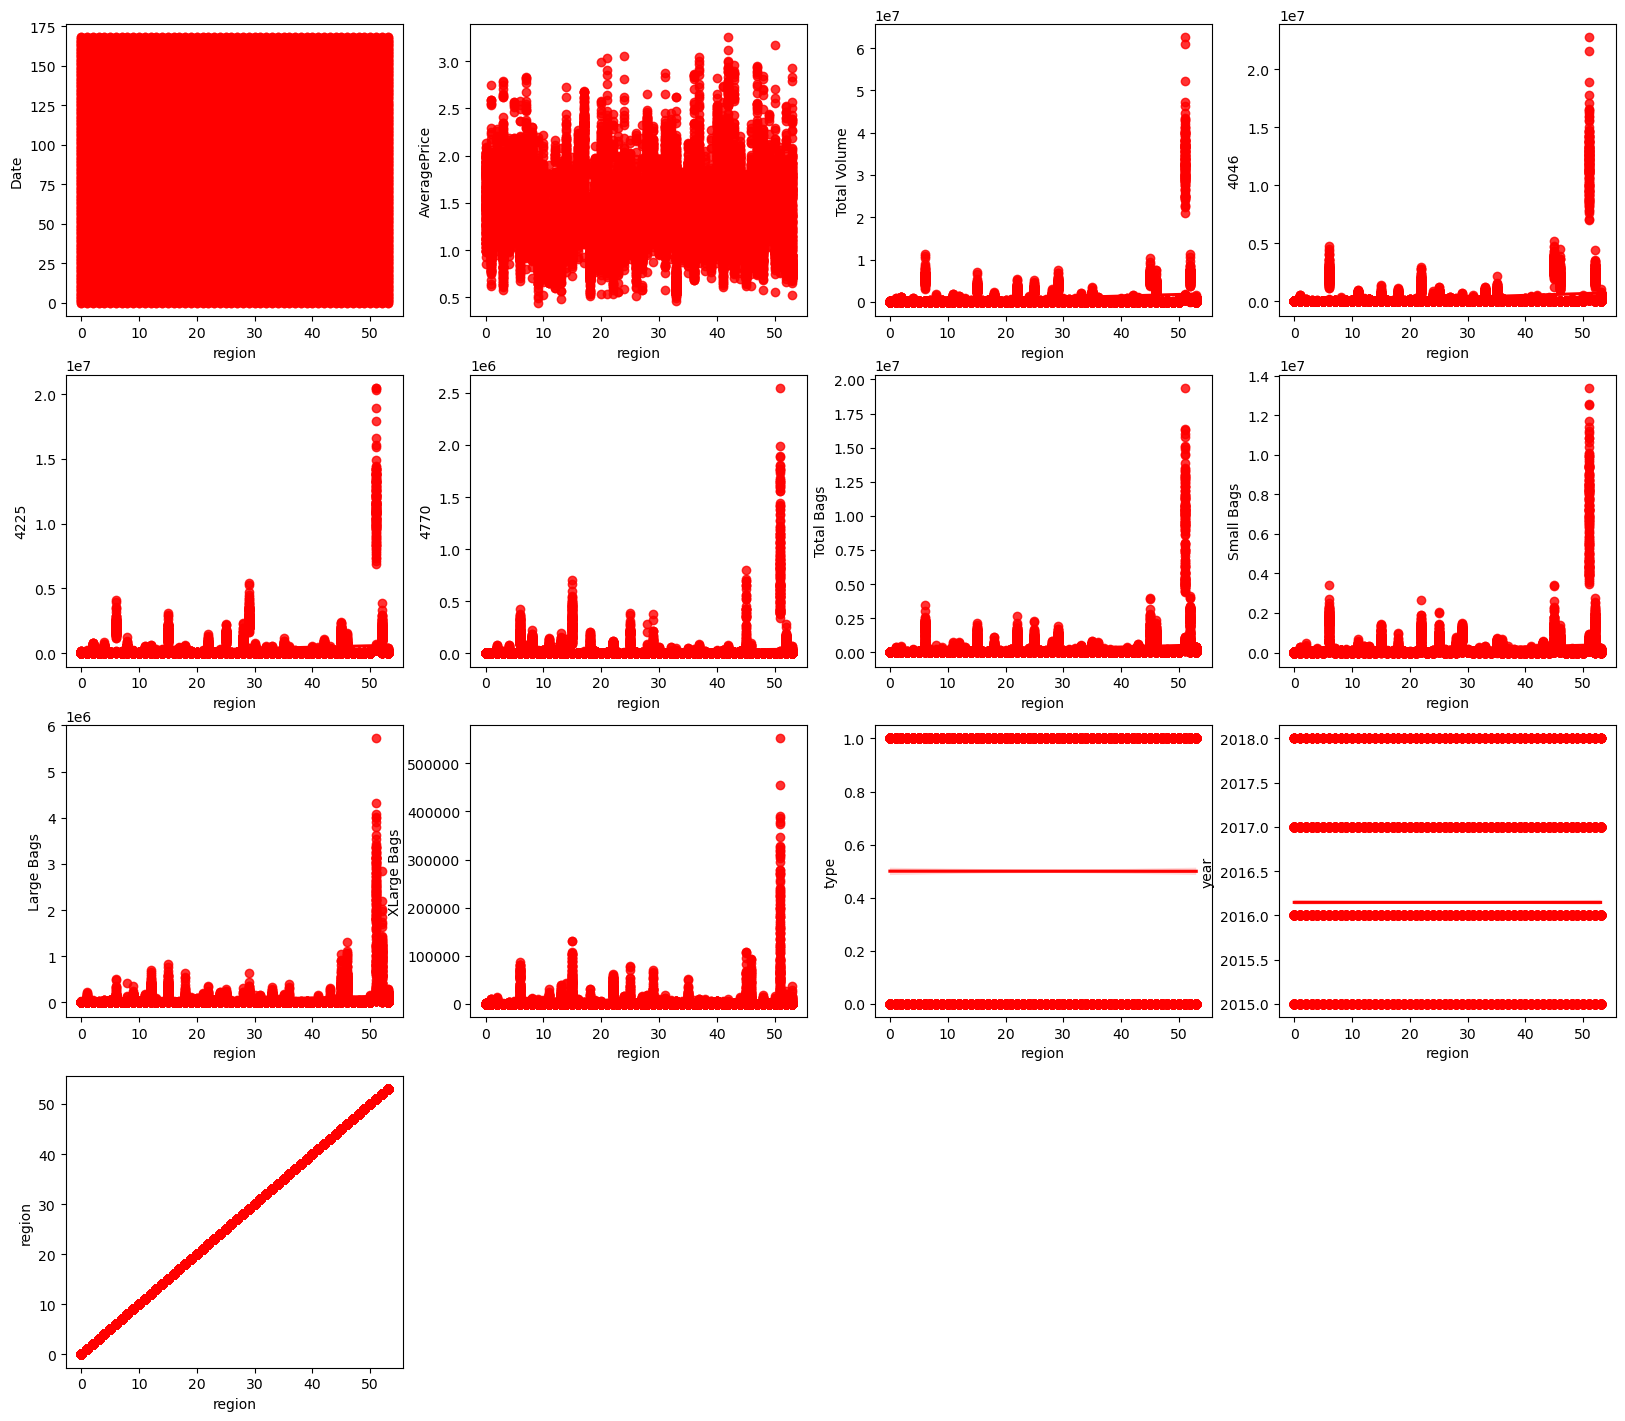

In [185]:
# Plot to check correlationship between features and label Region

plt.figure(figsize=(20,22))

p = 1

for i in df:
    if p <= 13:
        plt.subplot(5,4,p)
        snb.regplot(x='region', y=i, data=df, color='r')
        plt.xlabel='region'
        plt.ylabel=i
        
    p += 1

plt.show()

In [186]:
# Date is not showing strong corelationship with region and average prace and can be droped

df.drop(columns=['Date'], inplace=True)

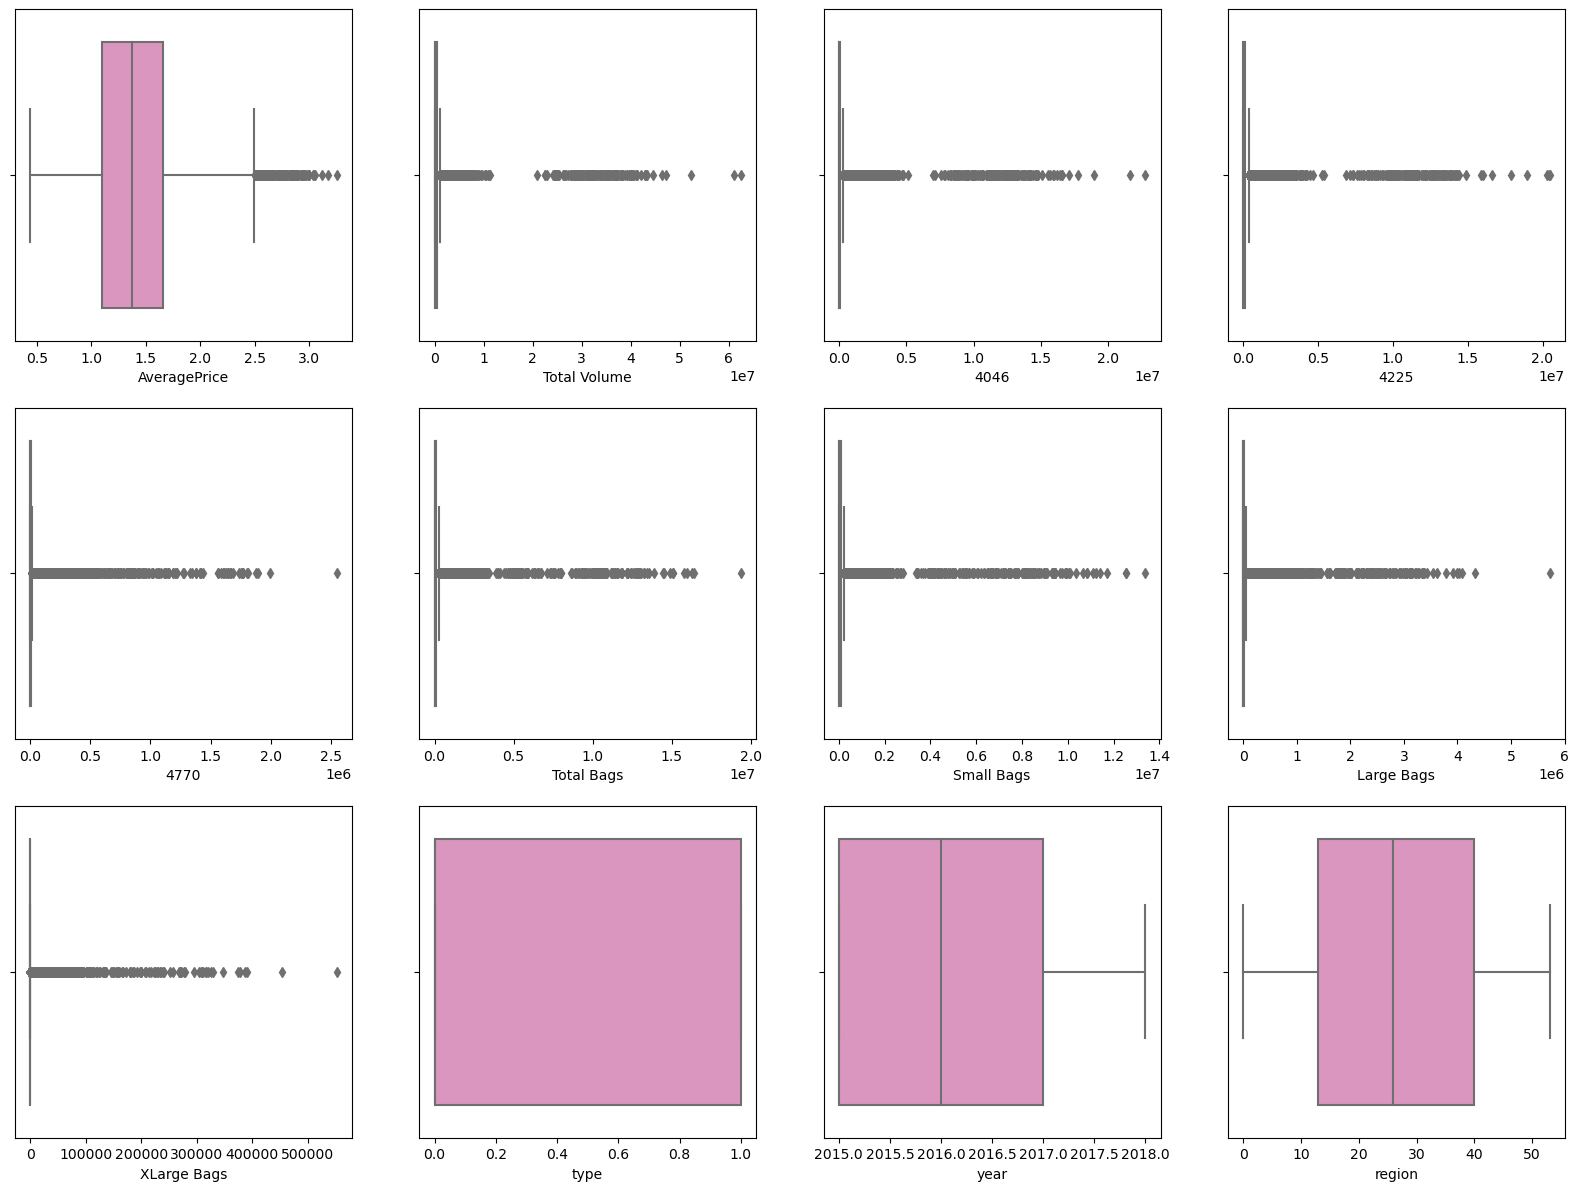

In [187]:
# Lets check for outliers using Boxplot

plt.figure(figsize=(20,25))

p=1

for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        snb.boxplot(df[i], palette='Set2_r')
        plt.xlabel=i
        
    p+=1
    
plt.show()

In [188]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.500014   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000      0.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000      0.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000      1.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000      1.000000   

               year        region  
count  18249.000000  18249.000000  
mean    2016.147899     26.495644  
std        0.939938     15.583788  
min     2015.000000      0.000000  
25%     2015.000000     13.000000  
50%     2016.000000     26.000000  
75%     2017.000000     40.000000  
max     2018.000000     53.000000

<function matplotlib.pyplot.show(close=None, block=None)>

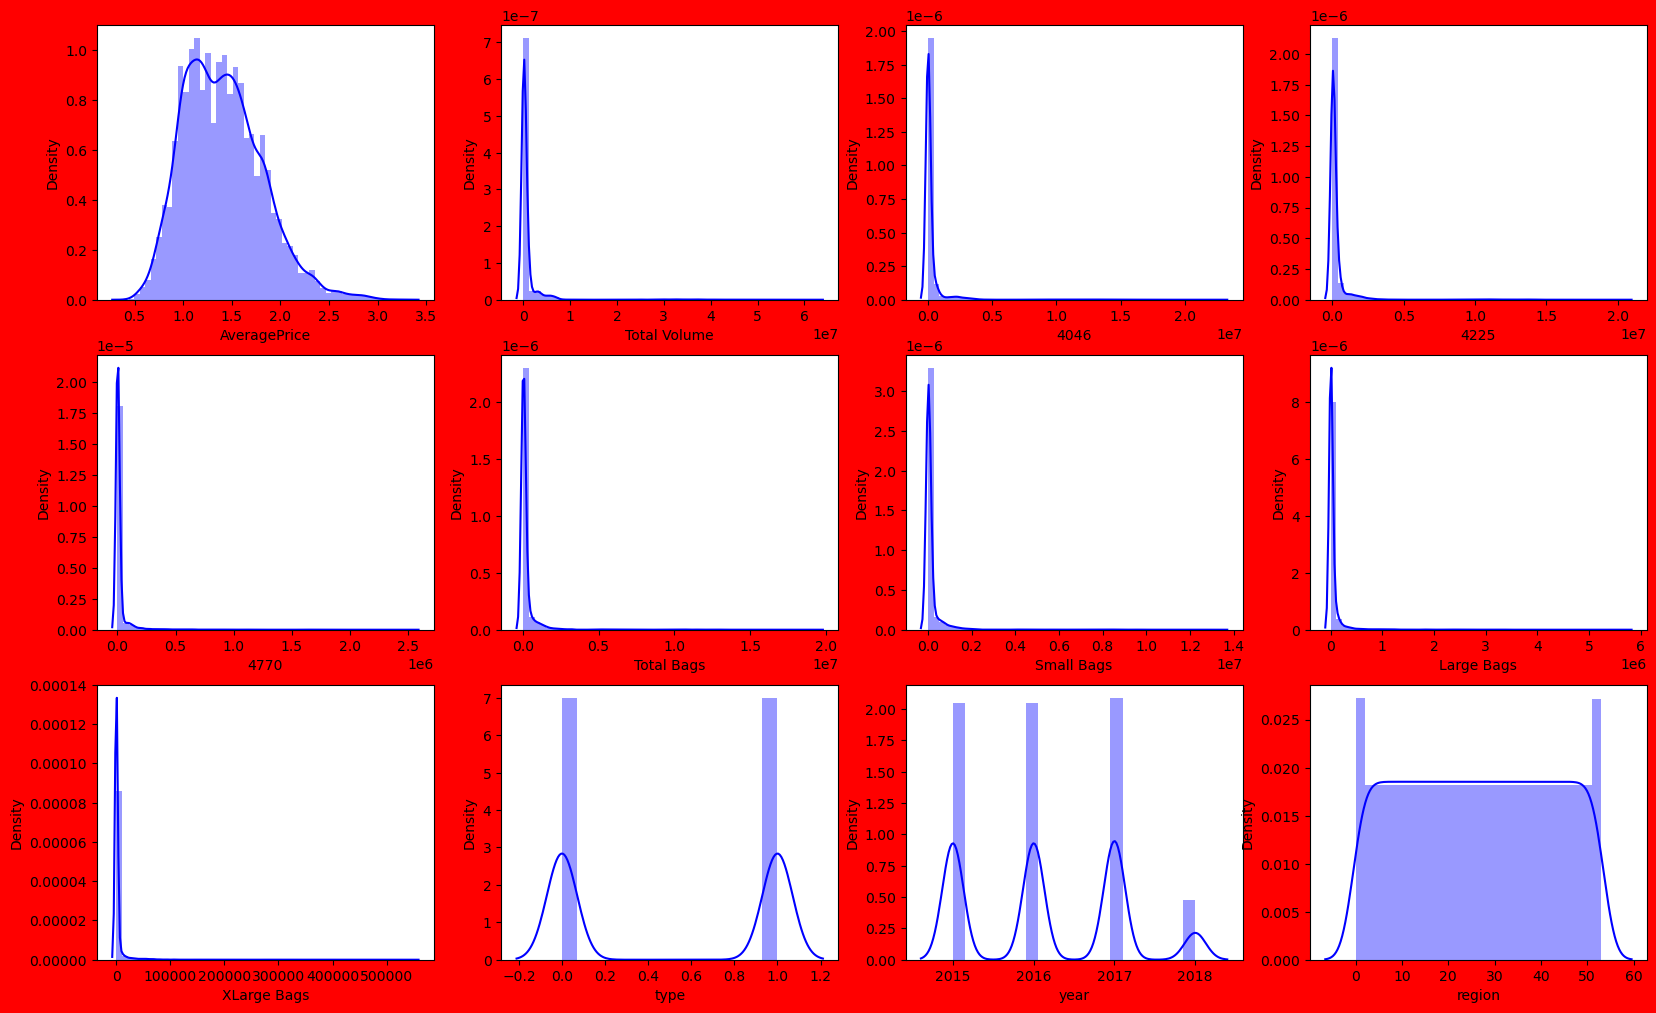

In [189]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df:
    if p<= 14:
        ax = plt.subplot(6,4,p)
        snb.distplot(df[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

In [190]:
# The chart confirm lots of out liers in averagePrice, Total volume, 4046,4225, 4770, Total Bags, 
# Small Bags, Large Bags and XLarge Bags. I will remove the outliers

#removing the outliers using zscore

from scipy.stats import zscore

out_features = df[['AveragePrice','Total Volume', '4046','4225','4770','Total Bags','Large Bags','XLarge Bags']]
z=np.abs(zscore(out_features))

z

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [191]:
# Using Threshold of 3 to check for outliers

np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428]),
 array([2, 2, 7, ..., 0, 0, 0]))

In [192]:
df2 = df[(z<3).all(axis=1)]

df2

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8603.62       93.25          0.0     0  2015       0  
1         9408.07       97.49          0.0     0  2015       0  
2         8042.21      103.14          0.0     0  2015       0  
3         5677.40      133.76          0.0     0  2015       0  
4         5986.26      197.69          0.0     0  2015       0  
...           ...         ...          ...   ...   ...     ...  
18244    13066.82      431.85          0.0     1  2018      53  
18245     8940.04      324.80          0.0     1  2018      53  
18246     9351.80       42.31          0.0     1  2018      53  
18247    10919.54       50.00          0.0     1  2018      53  
18248    11988.14       26.01          0.0     1  2018      53  

[17653 rows x 12 columns]

In [193]:
print('the shape of new data: ',df.shape[0])
print('the shape of old data: ',df2.shape[0])

print('percentage data loss after removing outliers ', ((df.shape[0] - df2.shape[0])/df.shape[0])* 100)

the shape of new data:  18249
the shape of old data:  17653
percentage data loss after removing outliers  3.26593237985643


Data loss is not much

<function matplotlib.pyplot.show(close=None, block=None)>

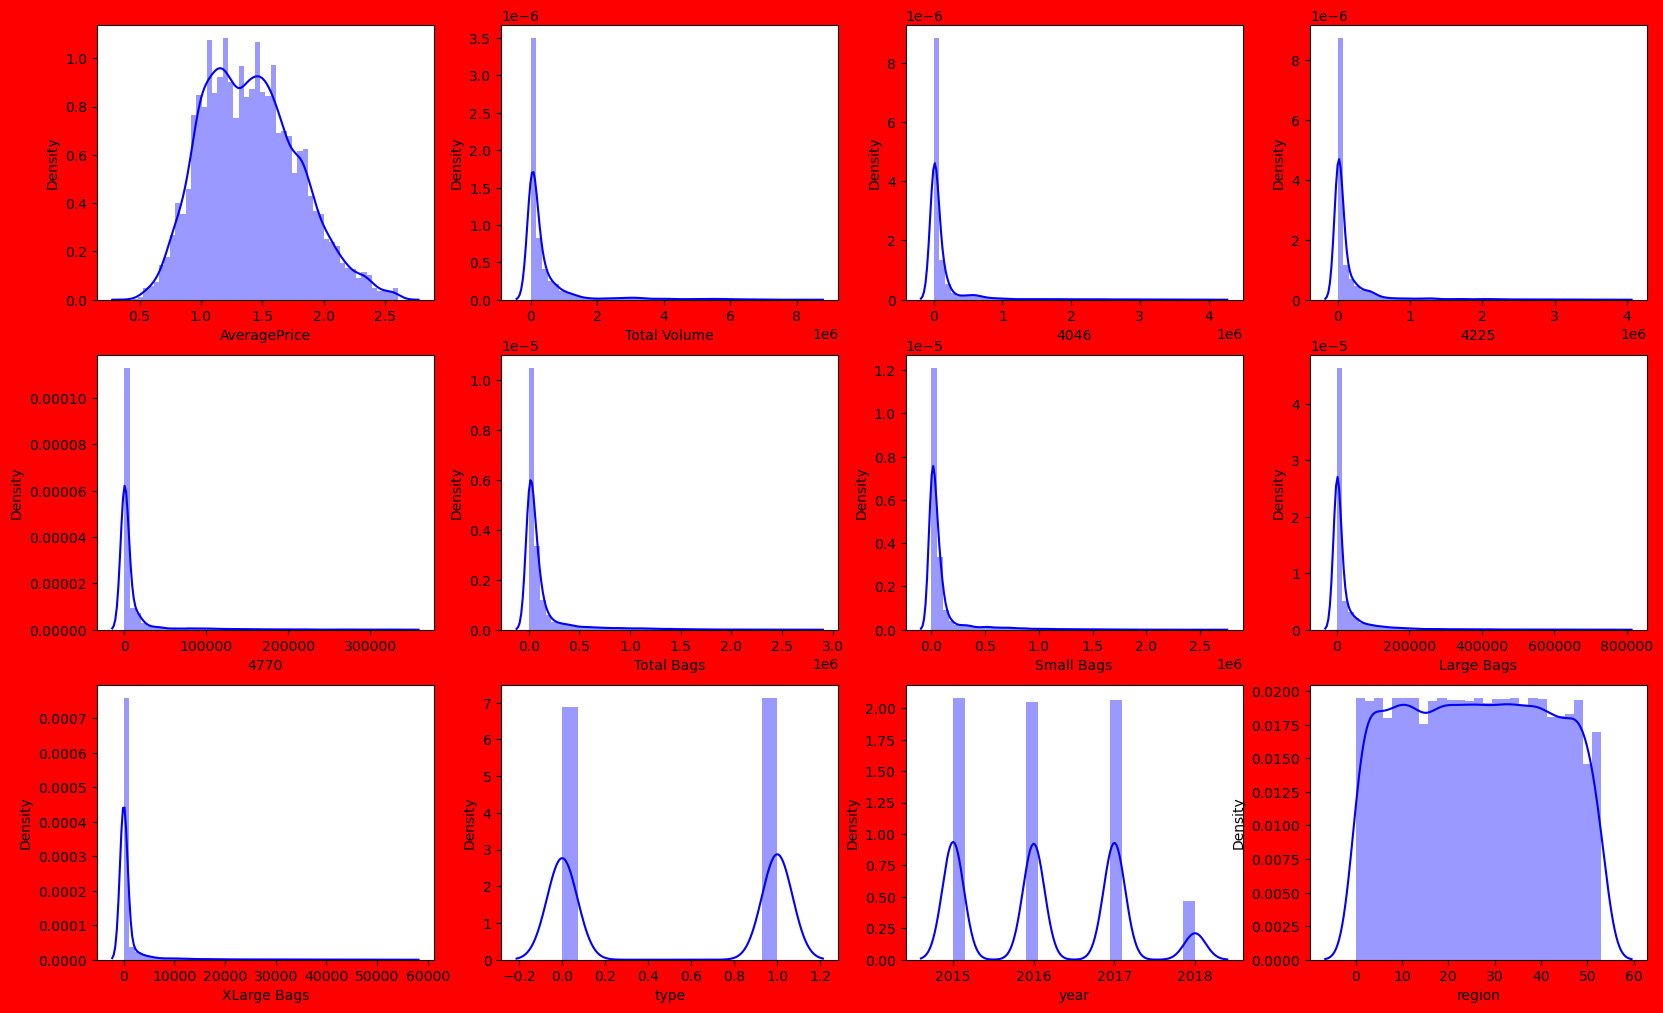

In [194]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df2:
    if p<= 14:
        ax = plt.subplot(6,4,p)
        snb.distplot(df2[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

In [195]:
# Checking for skewness

df2.skew()

AveragePrice    0.376942
Total Volume    3.770096
4046            4.903567
4225            4.451589
4770            5.111504
Total Bags      4.089312
Small Bags      4.277363
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [196]:
df2['Total Volume'] = np.log(df2['Total Volume'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            4.903567
4225            4.451589
4770            5.111504
Total Bags      4.089312
Small Bags      4.277363
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [198]:
df2['4046'] = np.cbrt(df2['4046'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            0.084318
4225            4.451589
4770            5.111504
Total Bags      4.089312
Small Bags      4.277363
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [200]:
df2['4225'] = np.cbrt(df2['4225'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            0.084318
4225            0.003043
4770            5.111504
Total Bags      4.089312
Small Bags      4.277363
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [202]:
df2['4770'] = np.cbrt(df2['4770'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            0.084318
4225            0.003043
4770           -0.102920
Total Bags      4.089312
Small Bags      4.277363
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [204]:
df2['Total Bags'] = np.cbrt(df2['Total Bags'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            0.084318
4225            0.003043
4770           -0.102920
Total Bags      0.142644
Small Bags      4.277363
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [205]:
df2['Small Bags'] = np.cbrt(df2['Small Bags'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            0.084318
4225            0.003043
4770           -0.102920
Total Bags      0.142644
Small Bags      1.250845
Large Bags      5.053647
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [206]:
df2['Large Bags'] = np.cbrt(df2['Large Bags'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            0.084318
4225            0.003043
4770           -0.102920
Total Bags      0.142644
Small Bags      1.250845
Large Bags      1.276073
XLarge Bags     6.127601
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

In [207]:
df2['XLarge Bags'] = np.cbrt(df2['XLarge Bags'])

df2.skew()

AveragePrice    0.376942
Total Volume   -0.049754
4046            0.084318
4225            0.003043
4770           -0.102920
Total Bags      0.142644
Small Bags      1.250845
Large Bags      1.276073
XLarge Bags     2.278377
type           -0.037510
year            0.229732
region          0.012937
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

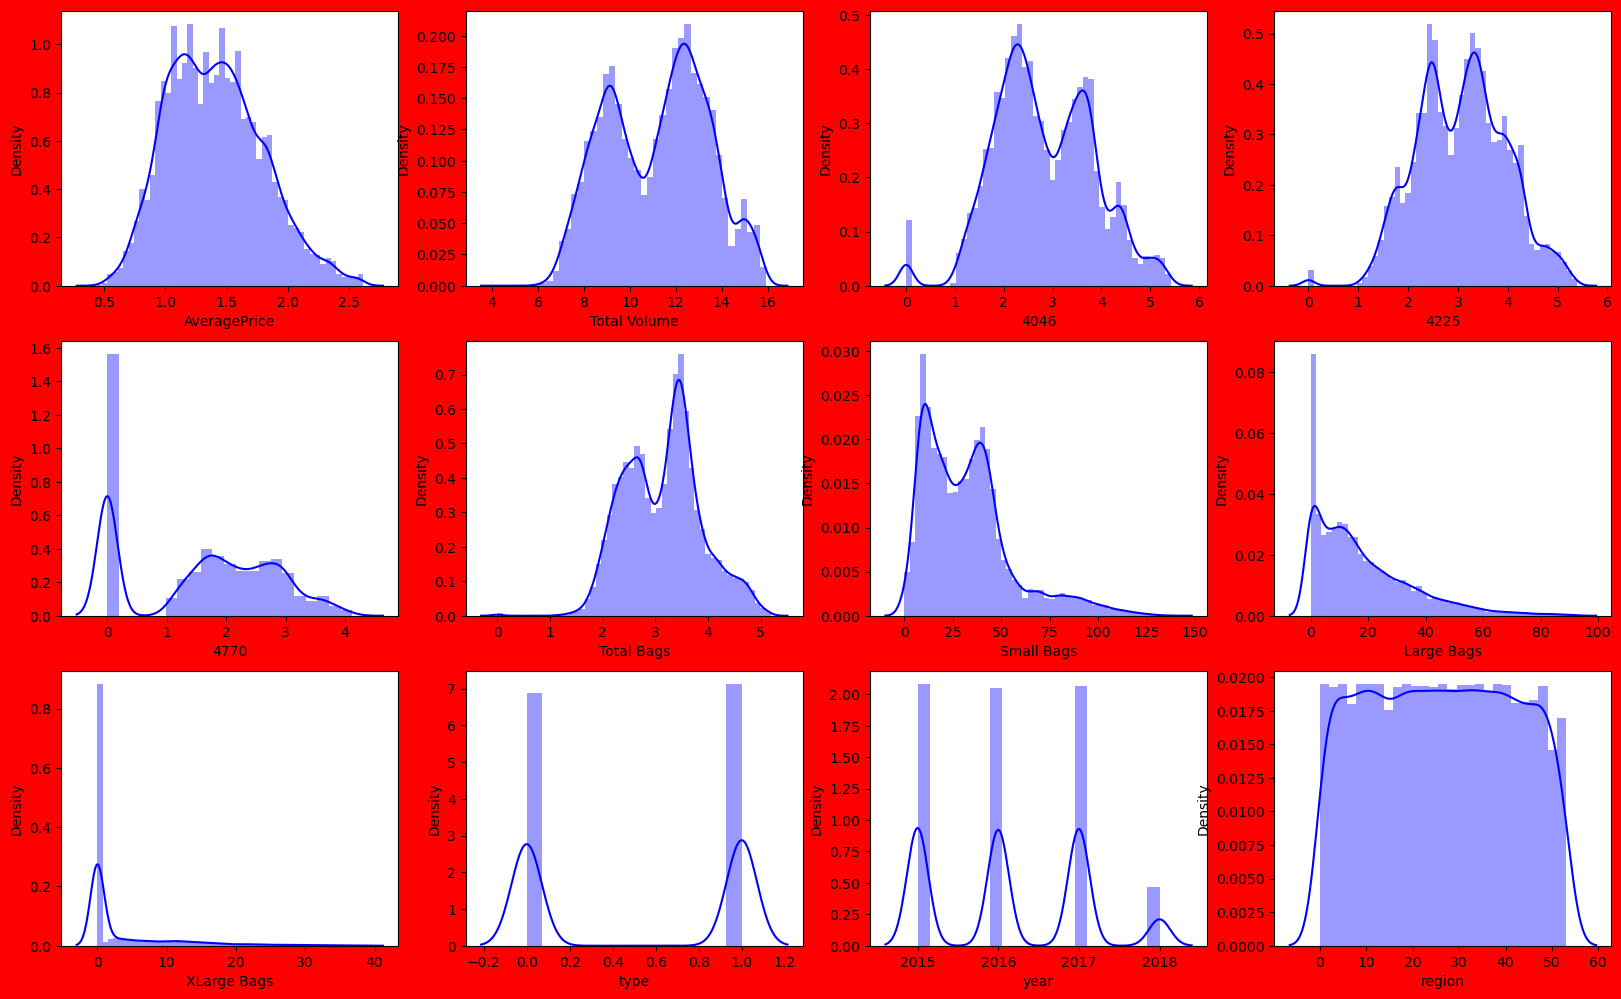

In [208]:
# Checking how data is distributed across columns

plt.figure(figsize=(20,25), facecolor='red')
p=1

for i in df2:
    if p<= 14:
        ax = plt.subplot(6,4,p)
        snb.distplot(df2[i], color='b')
        plt.xlabel=i
    p += 1
plt.show

The distribution is better now

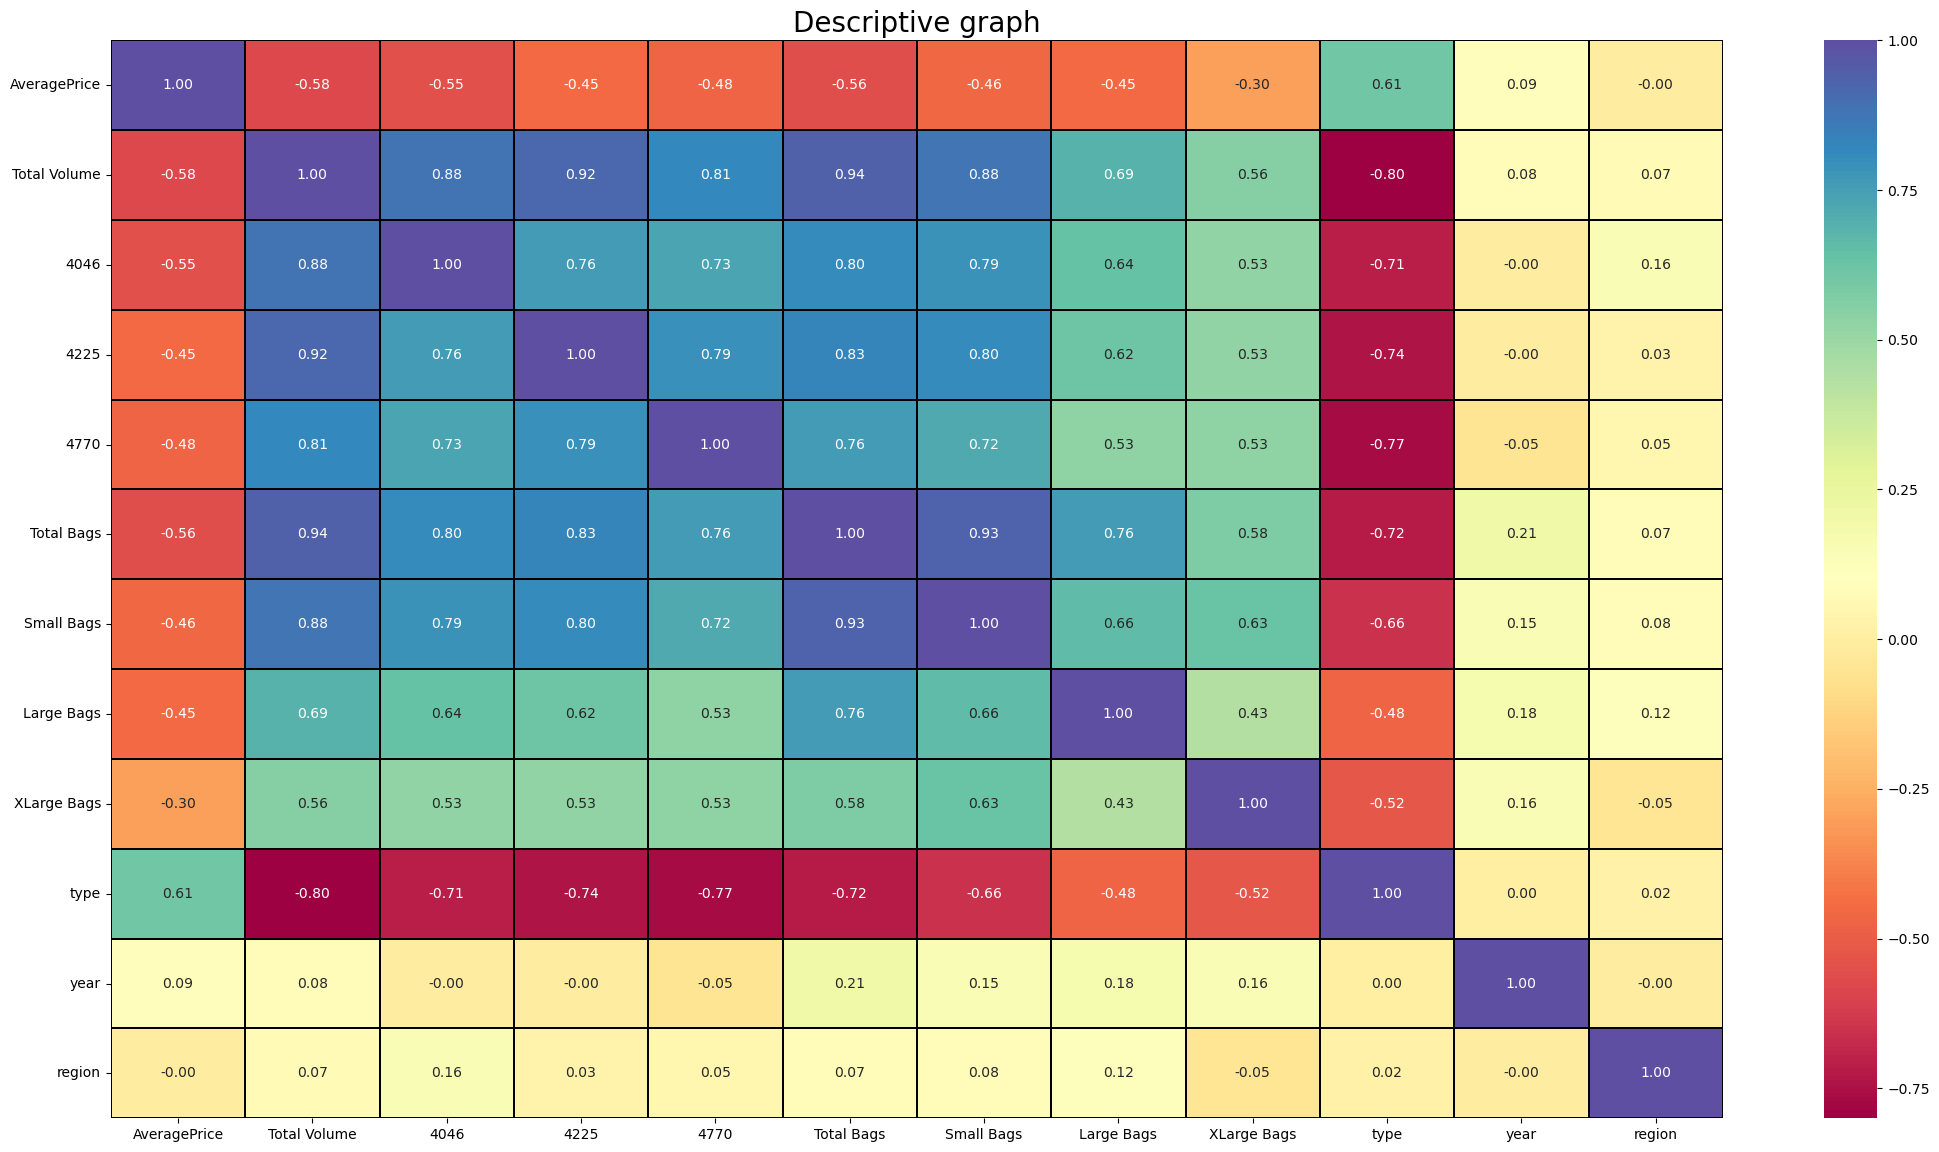

In [209]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df2.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

There is strong relationship between Total Volume and Total Bags, 4770, 4225, and 4046.
Let me check with more grahphs for validation and determine columns to drop



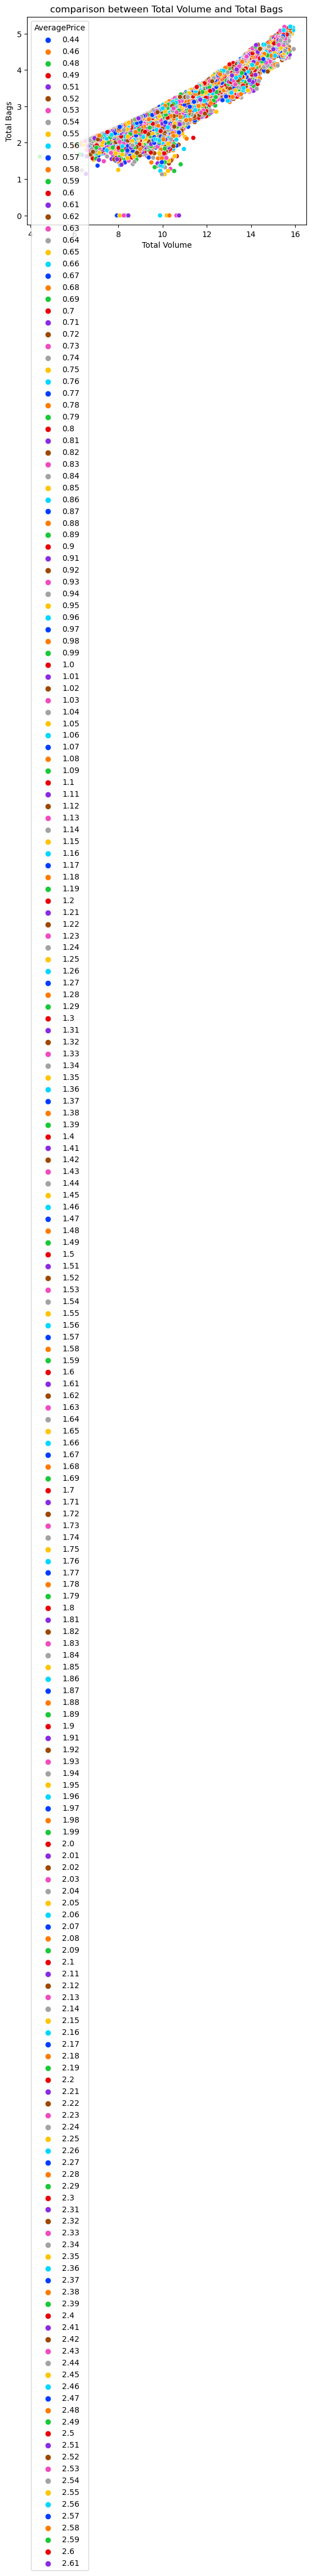

In [210]:
plt.title('comparison between Total Volume and Total Bags')
snb.scatterplot(x='Total Volume', y = 'Total Bags', data =df2, hue='AveragePrice', palette='bright')
plt.show()

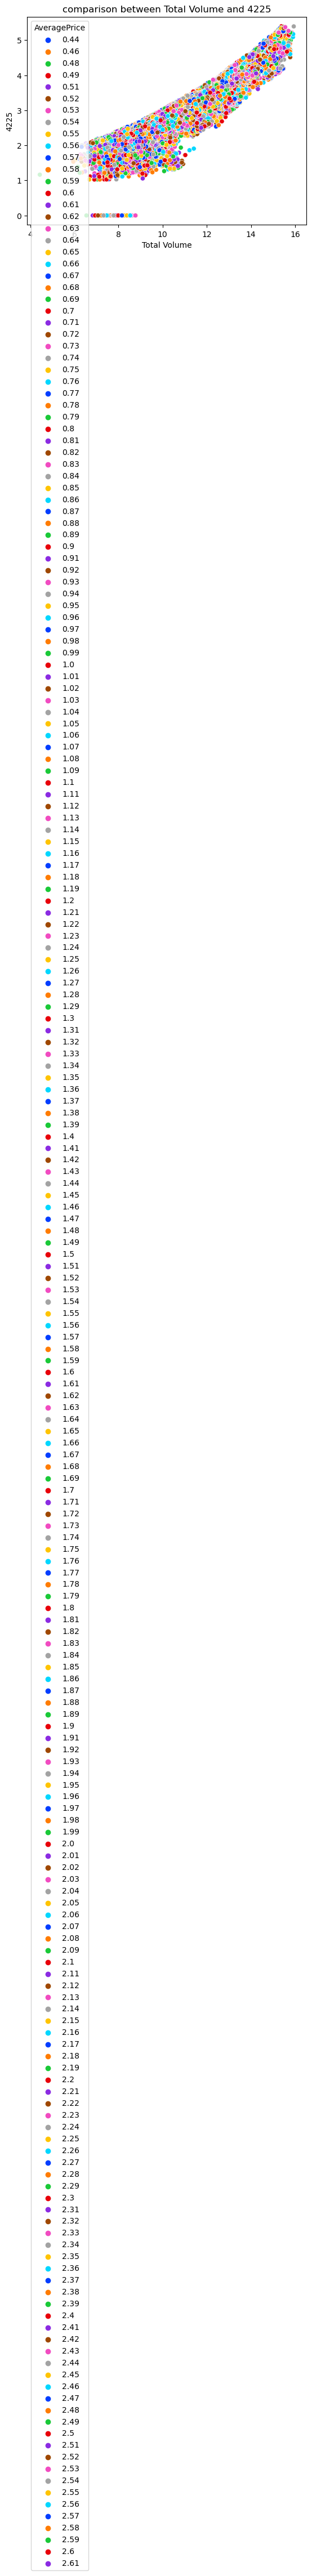

In [211]:
plt.title('comparison between Total Volume and 4225')
snb.scatterplot(x='Total Volume', y = '4225', data =df2, hue='AveragePrice', palette='bright')
plt.show()

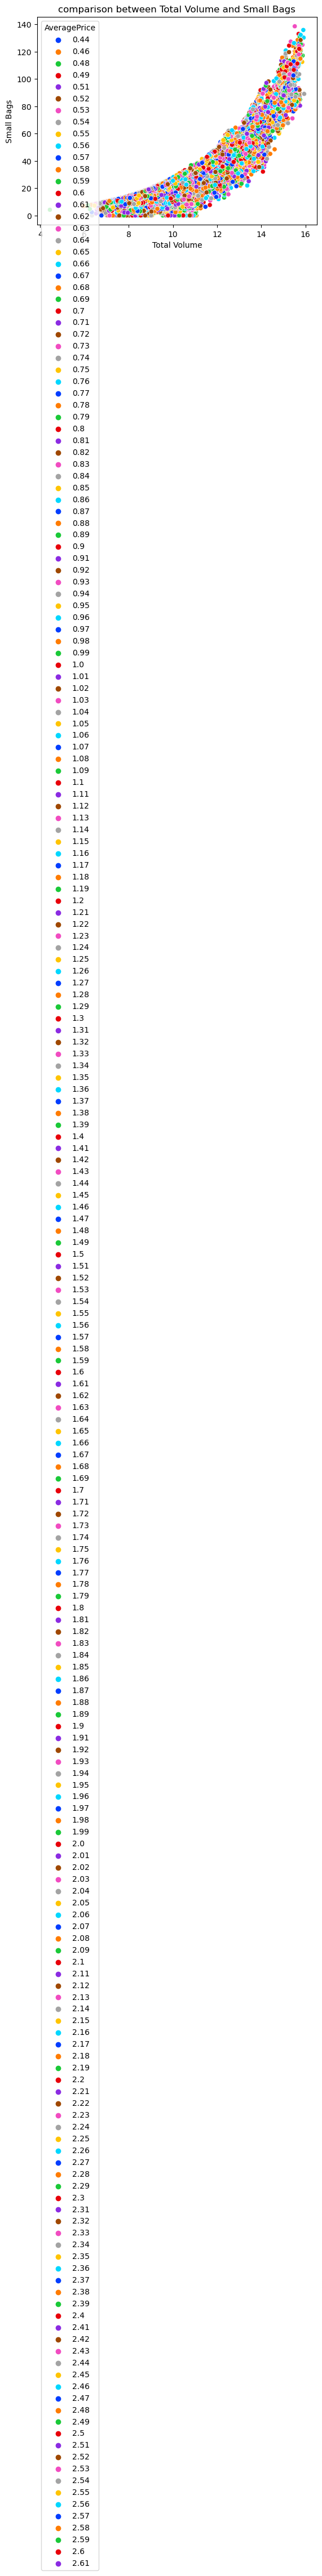

In [212]:
plt.title('comparison between Total Volume and Small Bags')
snb.scatterplot(x='Total Volume', y = 'Small Bags', data =df2, hue='AveragePrice', palette='bright')
plt.show()

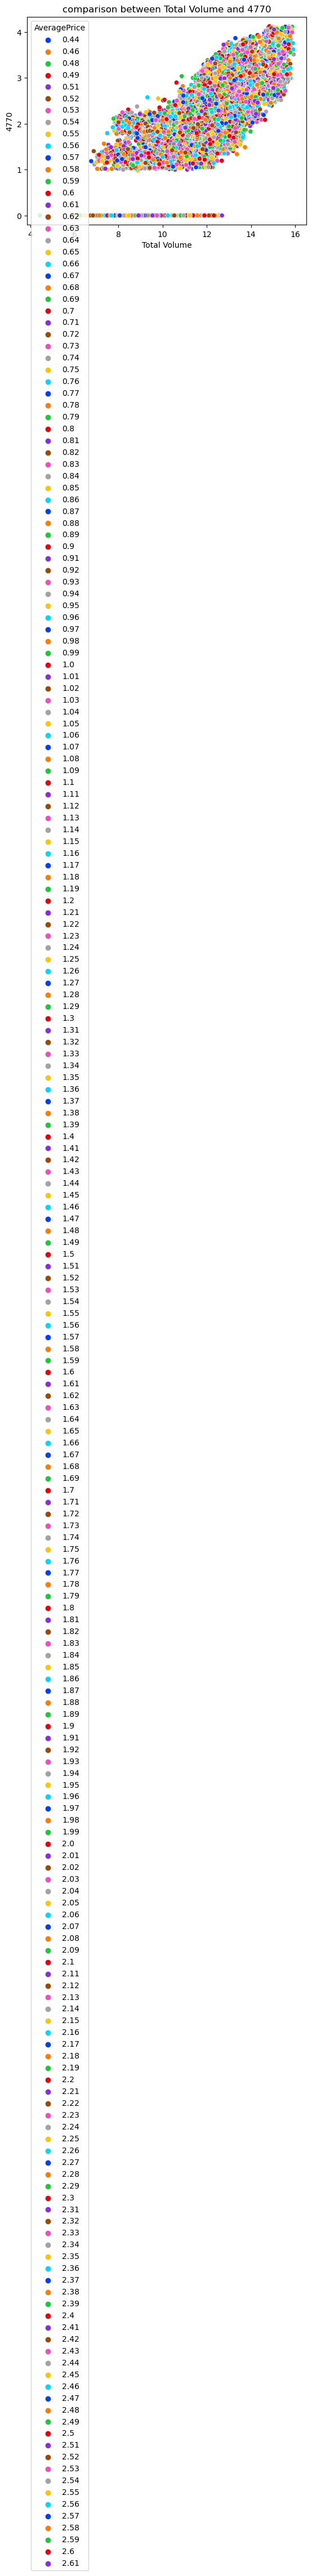

In [213]:
plt.title('comparison between Total Volume and 4770')
snb.scatterplot(x='Total Volume', y = '4770', data =df2, hue='AveragePrice', palette='bright')
plt.show()

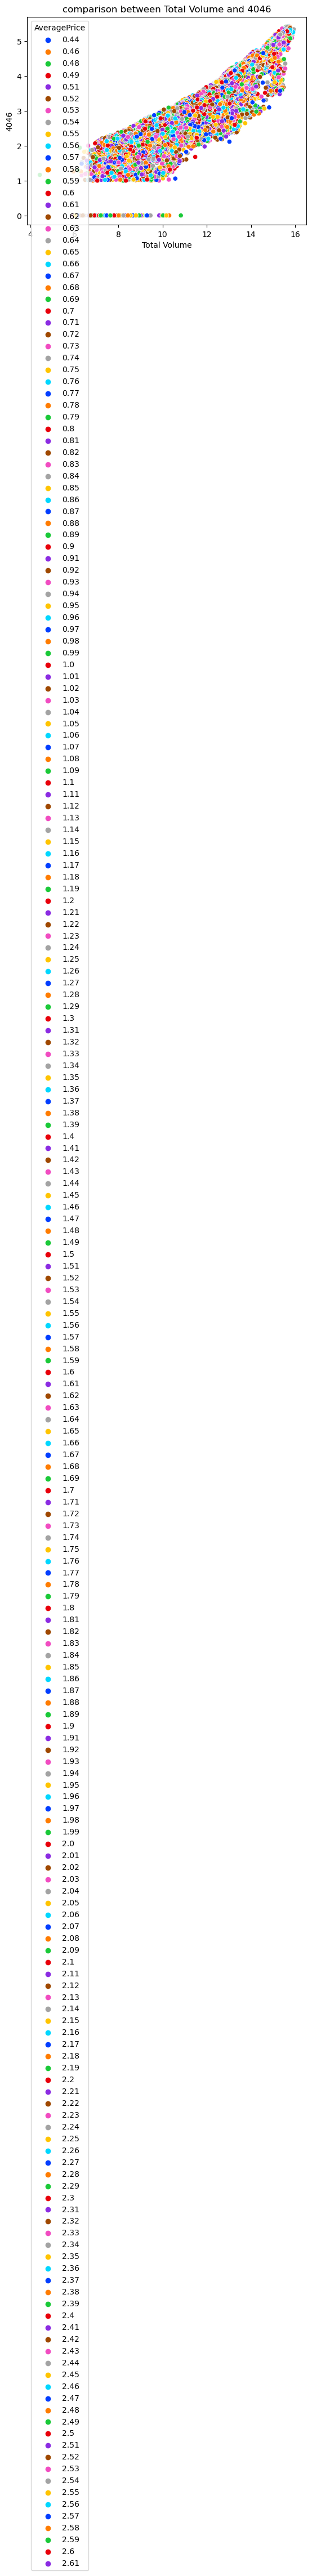

In [214]:
plt.title('comparison between Total Volume and 4046')
snb.scatterplot(x='Total Volume', y = '4046', data =df2, hue='AveragePrice', palette='bright')
plt.show()

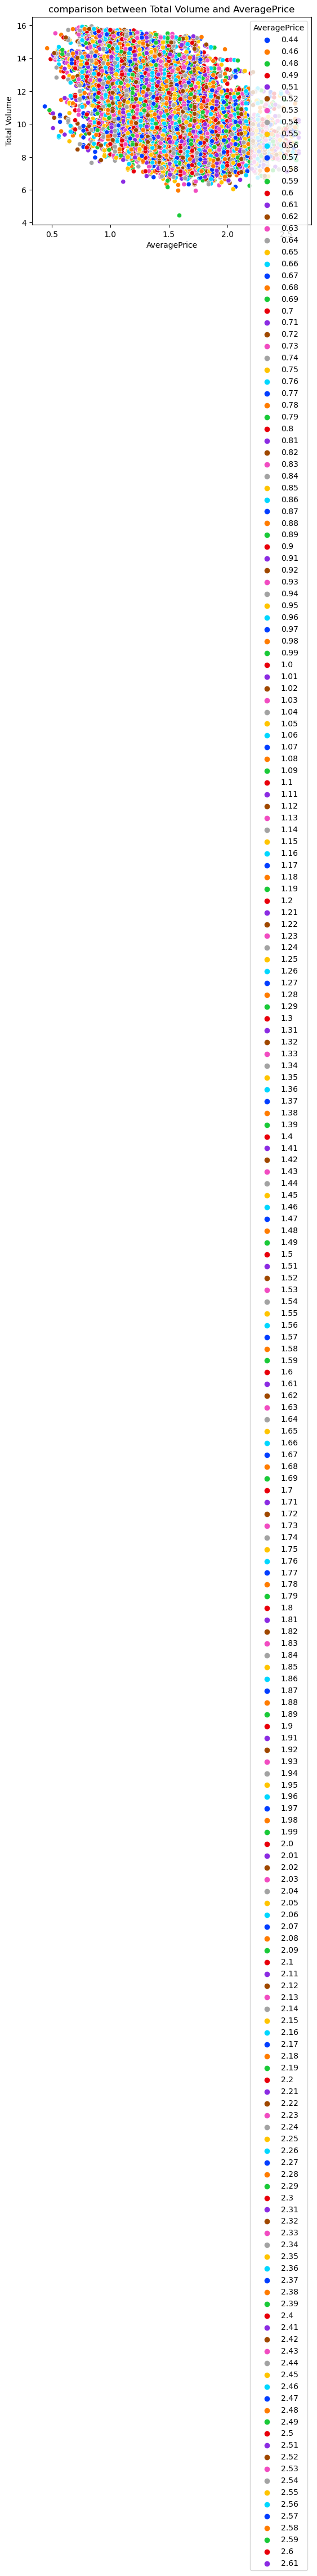

In [215]:
plt.title('comparison between Total Volume and AveragePrice')
snb.scatterplot(x='AveragePrice', y = 'Total Volume', data =df2, hue='AveragePrice', palette='bright')
plt.show()

# Solving the regression problem

In [216]:


#checking corelation between target and features
cor = df2.corr()
cor

cor['AveragePrice'].sort_values(ascending= False)

AveragePrice    1.000000
type            0.613203
year            0.091474
region         -0.003083
XLarge Bags    -0.300594
4225           -0.451911
Large Bags     -0.454413
Small Bags     -0.458830
4770           -0.475708
4046           -0.553292
Total Bags     -0.558316
Total Volume   -0.580487
Name: AveragePrice, dtype: float64

In [217]:
#Droping Total bags and check for multicorelation again

df3 = df2.drop(columns=['Total Bags','4046','4770','4225'])

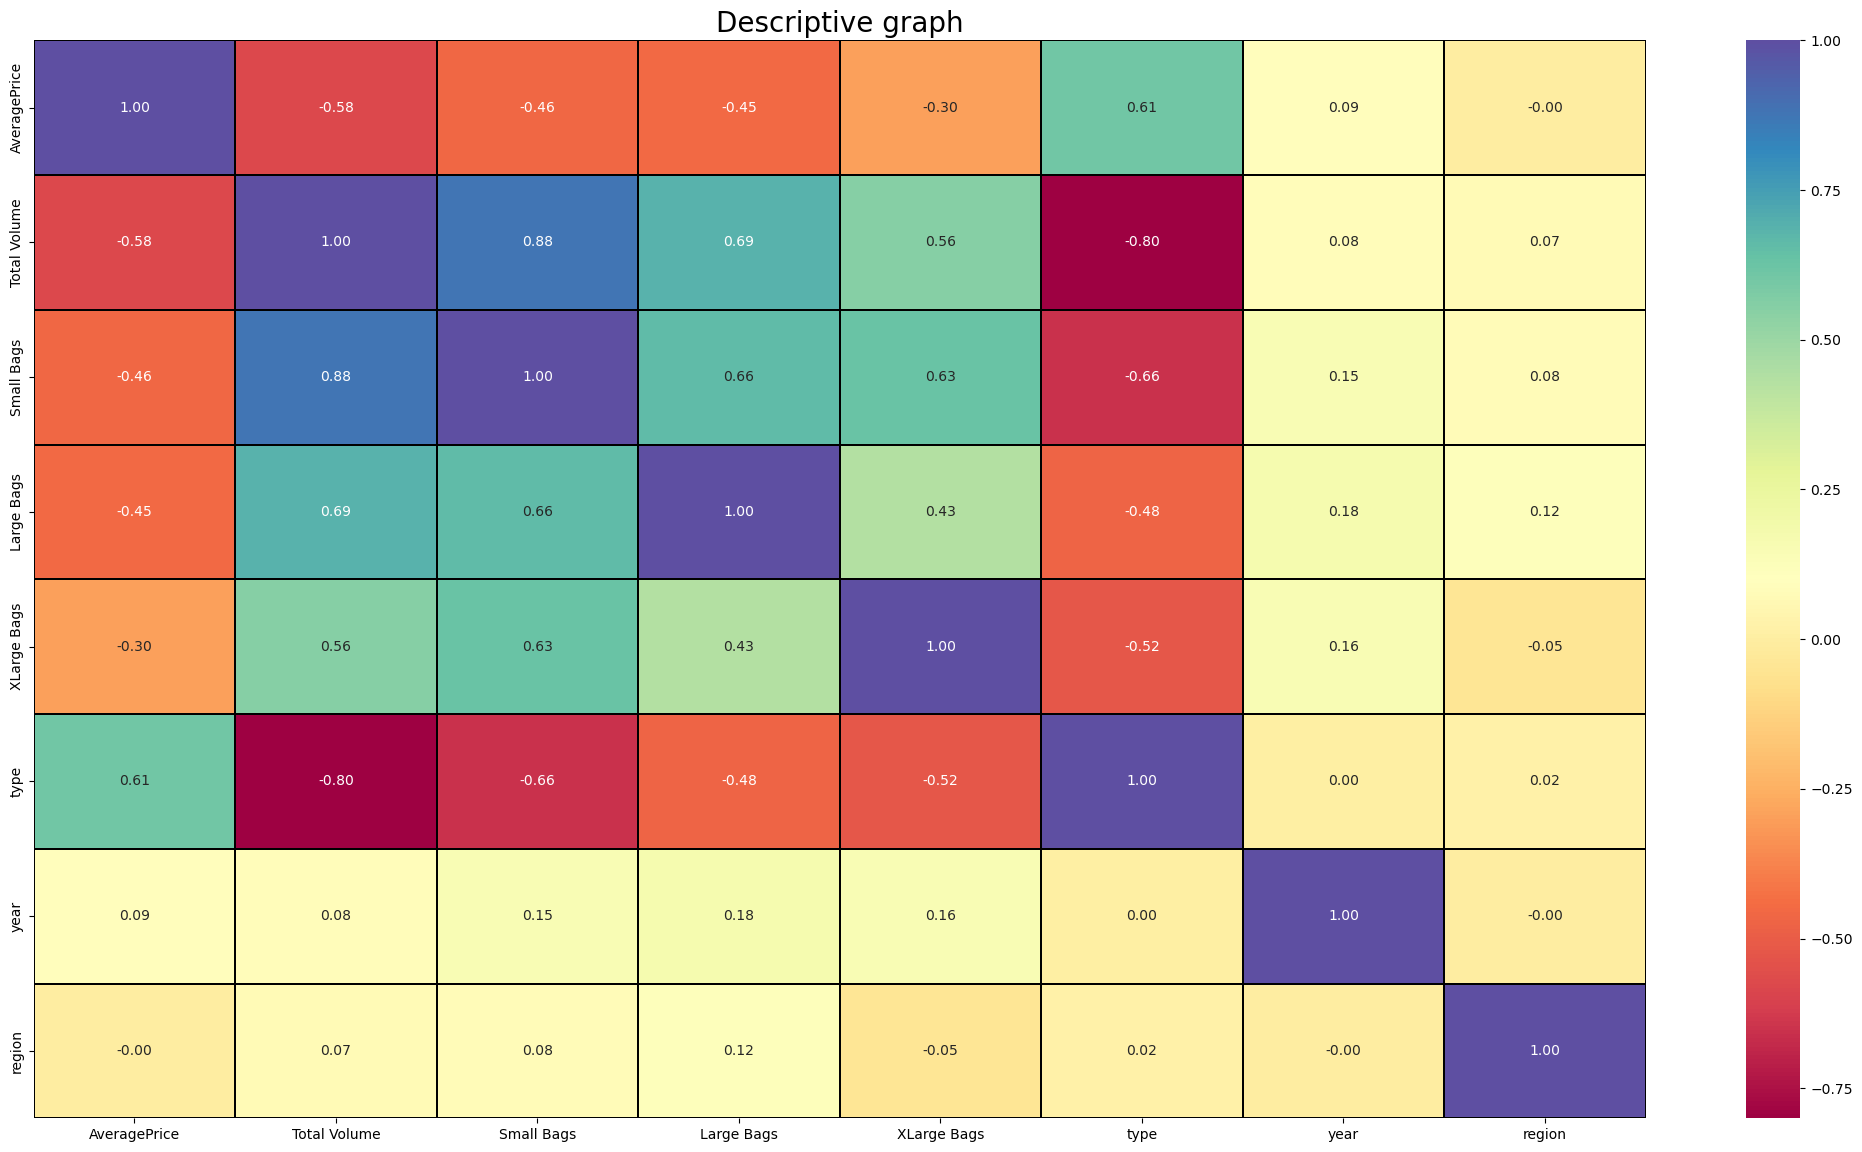

In [218]:
# Checking for multi-colinearity using heatmap
plt.figure(figsize=(26,14))
snb.heatmap(df3.corr(), annot=True, fmt='0.2f', linewidths=0.2, linecolor='black', cmap='Spectral')
plt.xlabel='figure'
plt.ylabel='feature name'
plt.title('Descriptive graph', fontsize=20)
plt.show()

In [219]:
df3 = df3.drop(columns=['Small Bags',])


In [220]:
df4 = df3

In [221]:
# Separate the label from features
x = df4.drop('AveragePrice', axis=1)

y = df4['AveragePrice']

In [222]:
x

Total Volume  Large Bags  XLarge Bags  type  year  region
0         11.070329    4.534711          0.0     0  2015       0
1         10.912849    4.602425          0.0     0  2015       0
2         11.680304    4.689671          0.0     0  2015       0
3         11.277104    5.114173          0.0     0  2015       0
4         10.840357    5.825433          0.0     0  2015       0
...             ...         ...          ...   ...   ...     ...
18244      9.745361    7.558651          0.0     1  2018      53
18245      9.538783    6.873934          0.0     1  2018      53
18246      9.530012    3.484558          0.0     1  2018      53
18247      9.693089    3.684031          0.0     1  2018      53
18248      9.769361    2.962876          0.0     1  2018      53

[17653 rows x 6 columns]

In [223]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

VIF Values      Features
0  120.569865  Total Volume
1    4.286426    Large Bags
2    1.922008   XLarge Bags
3    6.073809          type
4  127.556988          year
5    4.010696        region

In [224]:
# Year is not having significant impact on Average price and region, year will be droped

x.drop(columns=['year'], inplace=True)
x

Total Volume  Large Bags  XLarge Bags  type  region
0         11.070329    4.534711          0.0     0       0
1         10.912849    4.602425          0.0     0       0
2         11.680304    4.689671          0.0     0       0
3         11.277104    5.114173          0.0     0       0
4         10.840357    5.825433          0.0     0       0
...             ...         ...          ...   ...     ...
18244      9.745361    7.558651          0.0     1      53
18245      9.538783    6.873934          0.0     1      53
18246      9.530012    3.484558          0.0     1      53
18247      9.693089    3.684031          0.0     1      53
18248      9.769361    2.962876          0.0     1      53

[17653 rows x 5 columns]

In [225]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x

Total Volume  Large Bags  XLarge Bags      type    region
0         -0.062149   -0.796871    -0.518292 -1.018929 -1.695417
1         -0.134472   -0.792887    -0.518292 -1.018929 -1.695417
2          0.217984   -0.787753    -0.518292 -1.018929 -1.695417
3          0.032813   -0.762773    -0.518292 -1.018929 -1.695417
4         -0.167764   -0.720919    -0.518292 -1.018929 -1.695417
...             ...         ...          ...       ...       ...
17648     -0.670644   -0.618929    -0.518292  0.981422  1.747154
17649     -0.765516   -0.659221    -0.518292  0.981422  1.747154
17650     -0.769544   -0.858667    -0.518292  0.981422  1.747154
17651     -0.694650   -0.846929    -0.518292  0.981422  1.747154
17652     -0.659622   -0.889365    -0.518292  0.981422  1.747154

[17653 rows x 5 columns]

In [226]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

VIF Values      Features
0    4.386696  Total Volume
1    2.012240    Large Bags
2    1.515204   XLarge Bags
3    2.977240          type
4    1.035182        region

In [227]:
maxAccu = 0
maxRS = 0

for i in range(1,300):
    x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size =0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.4447803820244254  at random state :  60


In [228]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=maxRS)

In [229]:
LR = LinearRegression()
LR.fit(x_train, y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_LR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_LR))
print('mean squared error : ',mean_squared_error(y_test, pred_LR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_LR)))

R2 Score :  0.4447803820244254
R2 Score on training data :  40.890100111135666
mean absolute error :  0.22631411809316926
mean squared error :  0.08234357571107336
root mean squared error :  0.2869557033952686


In [230]:
knn = KNN()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_knn))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_knn))
print('mean squared error : ',mean_squared_error(y_test, pred_knn))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_knn)))

R2 Score :  0.6968548872006173
R2 Score on training data :  80.6637463064827
mean absolute error :  0.15458610271903322
mean squared error :  0.04495888066465257
root mean squared error :  0.2120350930026739


In [231]:
GRR = GradientBoostingRegressor()
GRR.fit(x_train, y_train)
pred_GRR = GRR.predict(x_test)
pred_train = GRR.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_GRR))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_GRR))
print('mean squared error : ',mean_squared_error(y_test, pred_GRR))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_GRR)))

R2 Score :  0.616020846017459
R2 Score on training data :  61.36534025741416
mean absolute error :  0.1830222395871091
mean squared error :  0.056947225050729786
root mean squared error :  0.2386361771624952


In [232]:
lasso = Lasso()
lasso.fit(x_train, y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_lasso))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_lasso))
print('mean squared error : ',mean_squared_error(y_test, pred_lasso))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2 Score :  -9.77977581479994e-05
R2 Score on training data :  0.0
mean absolute error :  0.31575466127055446
mean squared error :  0.14832262056669374
root mean squared error :  0.3851267590893857


In [233]:
ridge =Ridge()
ridge.fit(x_train, y_train)
pred_ridge = ridge.predict(x_test)
pred_train = ridge.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_ridge))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_ridge))
print('mean squared error : ',mean_squared_error(y_test, pred_ridge))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_ridge)))

R2 Score :  0.4447804442336849
R2 Score on training data :  40.89009974459048
mean absolute error :  0.22631453775440807
mean squared error :  0.08234356648493527
root mean squared error :  0.2869556873193756


In [234]:
dtr =DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print('R2 Score : ', r2_score(y_test, pred_dtr))
print('R2 Score on training data : ', r2_score(y_train, pred_train)*100)
print('mean absolute error : ',mean_absolute_error(y_test, pred_dtr))
print('mean squared error : ',mean_squared_error(y_test, pred_dtr))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2 Score :  0.5687577752197621
R2 Score on training data :  100.0
mean absolute error :  0.17746223564954683
mean squared error :  0.06395672205438066
root mean squared error :  0.25289666279803036


In [235]:
# KNN gives the best performance
# Cross validate to be sure of its performance

score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_knn) - score.mean())

[-1.17052549  0.00879335  0.24987422  0.07421548 -0.02330985]
-0.17219045719851828
Difference between R2 score and cross validation score is  0.8690453443991355


In [236]:
score = cross_val_score(GRR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ', r2_score(y_test, pred_GRR) - score.mean())

[-0.21873876  0.13847059  0.56793111  0.22998121  0.12958358]
0.16944554579613147
Difference between R2 score and cross validation score is  0.4465753002213275


# GradientBoostingRegressor is having lowest difference and very close test result and training result
# I will go for GradientBoostingRegressor

In [159]:
# The best choice is ridge

# The model with the least dif the best choice
# Hyper parameter tuning to get best parameter for my model
#Build model for best performing option

from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [100, 200, 300],       # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],               # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 1.0]               # Fraction of samples used for fitting the trees
}

gscv = GridSearchCV(GRR, param, cv=5)

gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]})

In [161]:
gscv.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300,
 'subsample': 1.0}

In [164]:
model= GradientBoostingRegressor(learning_rate=0.2,max_depth=5, min_samples_leaf=4, min_samples_split=10,n_estimators=300,subsample=1.0)

In [165]:
model.fit(x_train, y_train)
pred = model.predict(x_test)

print('R2 Score : ', r2_score(y_test, pred))
print('mean absolute error : ',mean_absolute_error(y_test, pred))
print('mean squared error : ',mean_squared_error(y_test, pred))
print('root mean squared error : ',np.sqrt(mean_squared_error(y_test, pred)))

R2 Score :  0.7395362037306268
mean absolute error :  0.14660344259448493
mean squared error :  0.038628895006091526
root mean squared error :  0.19654234914158203


After Hyperparameter tuning I got R2 score of 73% which is better than initial score

In [166]:
# Save model

import joblib
import pickle

filename = 'Avocado.pkl'
pickle.dump(model,open(filename, 'wb'))


In [167]:
loaded_model = pickle.load(open('Avocado.pkl','rb'))

result = loaded_model.score(x_test, y_test)
print(result * 100)

73.95362037306268


# Solving the Classification Problem

In [237]:
# Separate the label from features
cx = df3.drop('region', axis=1)

cy = df3['region']

In [239]:
cx

AveragePrice  Total Volume  Large Bags  XLarge Bags  type  year
0              1.33     11.070329    4.534711          0.0     0  2015
1              1.35     10.912849    4.602425          0.0     0  2015
2              0.93     11.680304    4.689671          0.0     0  2015
3              1.08     11.277104    5.114173          0.0     0  2015
4              1.28     10.840357    5.825433          0.0     0  2015
...             ...           ...         ...          ...   ...   ...
18244          1.63      9.745361    7.558651          0.0     1  2018
18245          1.71      9.538783    6.873934          0.0     1  2018
18246          1.87      9.530012    3.484558          0.0     1  2018
18247          1.93      9.693089    3.684031          0.0     1  2018
18248          1.62      9.769361    2.962876          0.0     1  2018

[17653 rows x 6 columns]

In [241]:
# feature scaling using standard scalarization to avoid biasness

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(cx), columns=cx.columns)

x

AveragePrice  Total Volume  Large Bags  XLarge Bags      type      year
0         -0.195096     -0.062149   -0.796871    -0.518292 -1.018929 -1.210128
1         -0.143262     -0.134472   -0.792887    -0.518292 -1.018929 -1.210128
2         -1.231776      0.217984   -0.787753    -0.518292 -1.018929 -1.210128
3         -0.843021      0.032813   -0.762773    -0.518292 -1.018929 -1.210128
4         -0.324681     -0.167764   -0.720919    -0.518292 -1.018929 -1.210128
...             ...           ...         ...          ...       ...       ...
17648      0.582414     -0.670644   -0.618929    -0.518292  0.981422  1.980670
17649      0.789750     -0.765516   -0.659221    -0.518292  0.981422  1.980670
17650      1.204422     -0.769544   -0.858667    -0.518292  0.981422  1.980670
17651      1.359924     -0.694650   -0.846929    -0.518292  0.981422  1.980670
17652      0.556497     -0.659622   -0.889365    -0.518292  0.981422  1.980670

[17653 rows x 6 columns]

In [ ]:
cy.co

In [242]:
# Check for variance inflation factor to further check for multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif['Features'] = x.columns

vif

VIF Values      Features
0    1.766418  AveragePrice
1    4.388442  Total Volume
2    2.107332    Large Bags
3    1.541563   XLarge Bags
4    3.346283          type
5    1.092046          year

VIF values is withing the acceptable threshold of 5

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(cx,cy ,test_size =0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is : ', maxAccu, ' at random state : ',maxRS)

Best accuracy is :  0.6063066465256798  at random state :  130


In [247]:
#creating train test split

x_train, x_test, y_train, y_test = train_test_split(cx,cy ,test_size =0.30, random_state=maxRS)

In [248]:
#RandomForestClassifier
#checking accuracy for random forest classifier 

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.6002643504531722
[[59  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  2]
 [ 0  1 66 ...  0  0  1]
 ...
 [ 0  0  0 ... 54  0  0]
 [ 0  0  0 ...  1 55  0]
 [ 0  0  1 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.53      0.64      0.58        92
           1       0.51      0.62      0.56        87
           2       0.69      0.59      0.64       112
           3       0.62      0.56      0.59       107
           4       0.53      0.61      0.57        90
           5       0.59      0.53      0.56       107
           6       0.89      0.88      0.88        90
           7       0.47      0.59      0.52        90
           8       0.61      0.66      0.63        93
           9       0.64      0.61      0.62       110
          10       0.42      0.42      0.42        98
          11       0.69      0.68      0.68       114
          12       0.71      0.67      0.69        92
          13       0.52      0.56      0.54        95
          14  

In [249]:
#LogisticsRegression
#checking accuracy for LogisticsRegression  

LR = LogisticRegression()
LR.fit(x_train, y_train)

predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.05853474320241692
[[40  7  0 ...  0  0  0]
 [ 1 22  0 ...  0  1  0]
 [18  4  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  7 27  0]
 [ 0  6  0 ... 13 13  0]
 [ 1  7  0 ...  2  9  0]]
              precision    recall  f1-score   support

           0       0.10      0.43      0.16        92
           1       0.04      0.25      0.07        87
           2       0.00      0.00      0.00       112
           3       0.00      0.00      0.00       107
           4       0.05      0.44      0.10        90
           5       0.00      0.00      0.00       107
           6       0.13      0.07      0.09        90
           7       0.00      0.00      0.00        90
           8       0.02      0.02      0.02        93
           9       0.00      0.00      0.00       110
          10       0.00      0.00      0.00        98
          11       0.00      0.00      0.00       114
          12       0.05      0.27      0.08        92
          13       0.01      0.03      0.02        95
          14 

In [250]:
#AdaBoostClassifier
#checking accuracy for AdaboostClassifier 

AD = AdaBoostClassifier()
AD.fit(x_train, y_train)

predAD = AD.predict(x_test)
print(accuracy_score(y_test, predAD))
print(confusion_matrix(y_test, predAD))
print(classification_report(y_test, predAD))

0.05740181268882175
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  6  0  0]
 [ 0  0 15 ... 46  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  1 ... 39  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.00      0.00      0.00        87
           2       0.10      0.13      0.12       112
           3       0.00      0.00      0.00       107
           4       0.00      0.00      0.00        90
           5       0.00      0.00      0.00       107
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00        90
           8       0.00      0.00      0.00        93
           9       0.00      0.00      0.00       110
          10       0.00      0.00      0.00        98
          11       0.00      0.00      0.00       114
          12       0.09      0.26      0.13        92
          13       0.00      0.00      0.00        95
          14 

In [251]:
#ExtraTreeClassifier
#checking accuracy for ExtraTreeClassifier 

ET = ExtraTreesClassifier()
ET.fit(x_train, y_train)

predET = ET.predict(x_test)
print(accuracy_score(y_test, predET))
print(confusion_matrix(y_test, predET))
print(classification_report(y_test, predET))

0.6074395770392749
[[62  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  4]
 [ 0  1 70 ...  0  0  2]
 ...
 [ 0  0  0 ... 54  0  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  0  0 ...  0  0 49]]
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        92
           1       0.46      0.55      0.50        87
           2       0.71      0.62      0.67       112
           3       0.65      0.58      0.61       107
           4       0.52      0.62      0.57        90
           5       0.60      0.54      0.57       107
           6       0.87      0.88      0.87        90
           7       0.50      0.61      0.55        90
           8       0.67      0.69      0.68        93
           9       0.65      0.62      0.64       110
          10       0.38      0.41      0.39        98
          11       0.67      0.66      0.66       114
          12       0.69      0.63      0.66        92
          13       0.53      0.58      0.56        95
          14  

In [253]:
# Validation accuracy score to be sure its not as a result of over fitting 

# Using Cross validation

from sklearn.model_selection import cross_val_score

score = cross_val_score(RFC,cx,cy)
print(score)
print(score.mean())
print('Difference between accuracy score and RandomForestClassifier is ', accuracy_score(y_test, predRFC) - score.mean())

[0.3701501  0.42027754 0.34890966 0.25609065 0.18300283]
0.3156861565270133
Difference between accuracy score and RandomForestClassifier is  0.28457819392615885


In [257]:
score = cross_val_score(ET,cx,cy)
print(score)
print(score.mean())
print('Difference between accuracy score and ExtraTreesClassifier is ', accuracy_score(y_test, predET) - score.mean())

[0.38487681 0.38969131 0.36137072 0.25750708 0.17393768]
0.3134767173468823
Difference between accuracy score and ExtraTreesClassifier is  0.29396285969239255


RFC has the smallest difference, so I will go for it

In [ ]:
#Hyper parameter Tunning 
#Type of cross validation method to get best values for model parameters.

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'criterion': ['gini', 'entropy'],      # Criterion to measure the quality of a split
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

GCV = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)

GCV.fit(x_train, y_train)